In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df = pd.read_csv("Data_Negara_HELP.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [2]:
#penjelasan deskriptif
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [3]:
#cek duplikasi data
df.duplicated().any()

False

In [4]:
#cek missing value
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [5]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
#ekspor, kesehatan, dan impor merupakan nilai satuan per kapita, maka diubah menjadi value
df['Ekspor'] = (df['Ekspor']*df['GDPperkapita'])/100
df['Kesehatan'] = (df['Kesehatan']*df['GDPperkapita'])/100
df['Impor'] = (df['Impor']*df['GDPperkapita'])/100
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


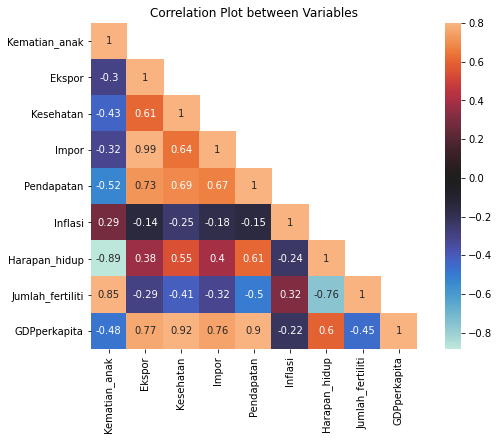

In [7]:
#uji korelasi
plt.figure(figsize = (10, 6))
corr_dat = df.corr()
mask = np.array(corr_dat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_dat,mask=mask, vmax=.8, square=True, center=0, annot = True)
plt.title("Correlation Plot between Variables")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

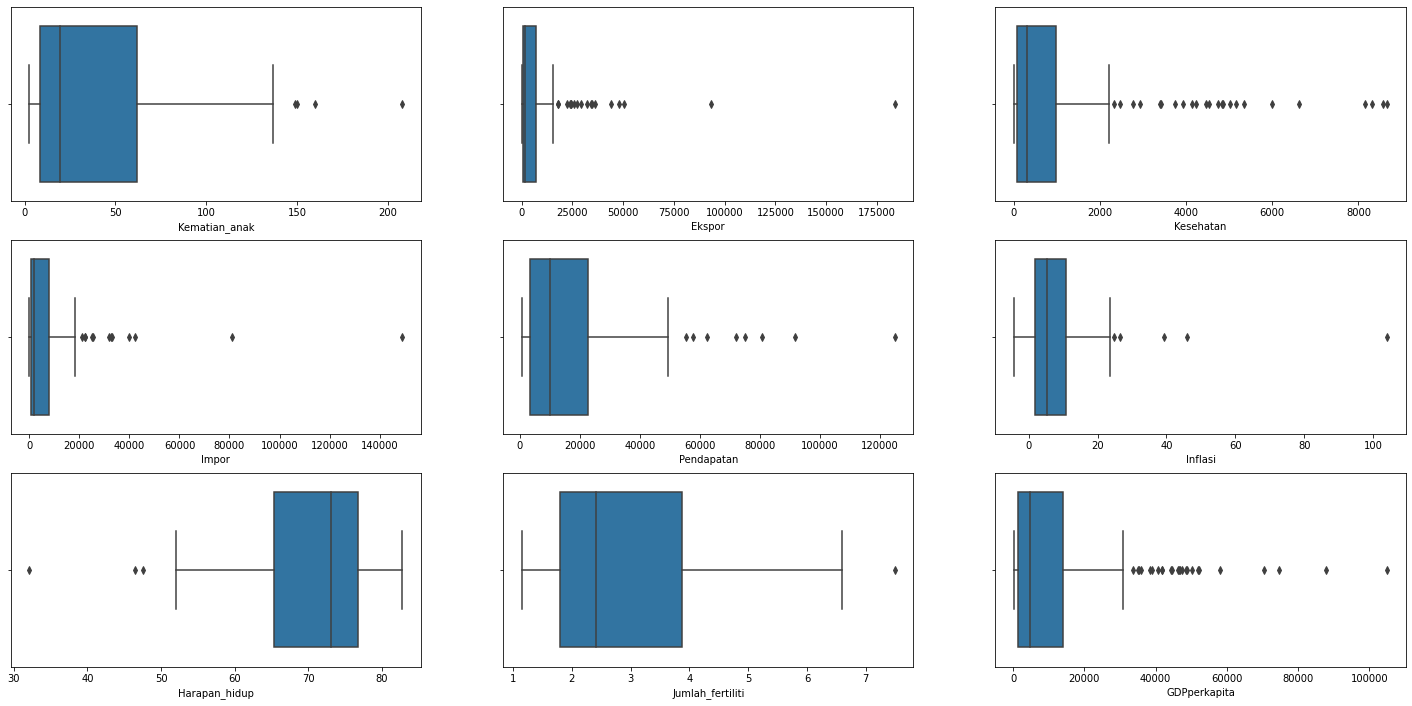

In [8]:
plt.figure(figsize = (25,25))
feature = df.columns[1::1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.boxplot(df[i[1]])

sebelum outlier dihapus, dilakukan eksplorasi data

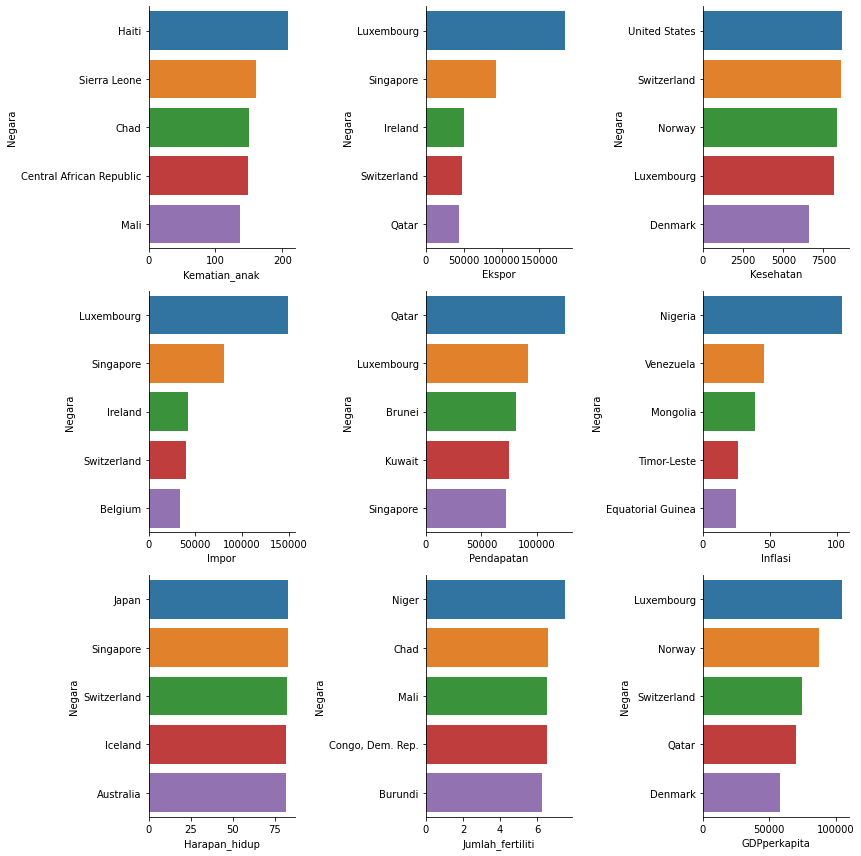

In [9]:
#Negara dengan kematian anak terbesar
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
kolom = ['Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
         'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita']

i=0
j=0

for col in kolom:
    if col != 'GDPperkapita':
        top10 = df[['Negara',col]].sort_values(col, ascending = False)
        sns.barplot(y='Negara',x=col,data=top10.nlargest(5,col), ax=axes[i,j])
        sns.despine()
    else:
        continue
    if j!= 2:
        j += 1
    else:
        i += 1
        j = 0
        
top10gdp = df[['Negara','GDPperkapita']].sort_values('GDPperkapita', ascending = False)
sns.barplot(y='Negara', x='GDPperkapita', data=top10gdp.nlargest(5,'GDPperkapita'),ax=axes[2,2])

fig.tight_layout()

In [10]:
df2 = df

In [11]:
q11=df2["Jumlah_fertiliti"].quantile(0.25)
q31=df2["Jumlah_fertiliti"].quantile(0.75)
iqr1=q31-q11
lb1=q11-iqr1*1.5
ub1=q31+iqr1*1.5

def removeoutliers(df2, Jumlah_fertiliti):
    global outlier
    global filtered
     
    outlier = [x for x in df2["Jumlah_fertiliti"] if ((x > lb1) & (x < ub1))]
    filtered = df2.loc[df2["Jumlah_fertiliti"].isin(outlier)]
 
 
for i in df2.columns:
    removeoutliers(df2, i)

df2 = filtered

In [12]:
q12=df2["Inflasi"].quantile(0.25)
q32=df2["Inflasi"].quantile(0.75)
iqr2=q32-q12
lb2=q12-iqr2*1.5
ub2=q32+iqr2*1.5

def removeoutliers(df2, Inflasi):
    global outlier
    global filtered
     
    outlier = [x for x in df2["Inflasi"] if ((x > lb2) & (x < ub2))]
    filtered = df2.loc[df2["Inflasi"].isin(outlier)]
 
 
for i in df2.columns:
    removeoutliers(df2, i)

df2 = filtered

In [13]:
q13=df2["Kematian_anak"].quantile(0.25)
q33=df2["Kematian_anak"].quantile(0.75)
iqr3=q33-q13
lb3=q13-iqr3*1.5
ub3=q33+iqr3*1.5

def removeoutliers(df2, Kematian_anak):
    global outlier
    global filtered
     
    outlier = [x for x in df2["Kematian_anak"] if ((x > lb3) & (x < ub3))]
    filtered = df2.loc[df2["Kematian_anak"].isin(outlier)]
 
 
for i in df2.columns:
    removeoutliers(df2, i)

df2 = filtered

In [38]:
q14=df2["GDPperkapita"].quantile(0.25)
q34=df2["GDPperkapita"].quantile(0.75)
iqr4=q34-q14
lb4=q14-iqr4*1.5
ub4=q34+iqr4*1.5

def removeoutliers(df2, GDPperkapita):
    global outlier
    global filtered
     
    outlier = [x for x in df2["GDPperkapita"] if ((x > lb4) & (x < ub4))]
    filtered = df2.loc[df2["GDPperkapita"].isin(outlier)]
 
 
for i in df2.columns:
    removeoutliers(df2, i)

df2 = filtered

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

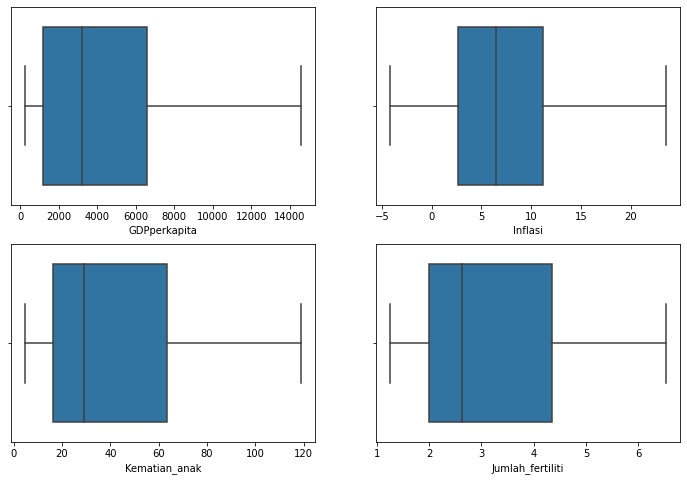

In [39]:
fig,axs = plt.subplots(2,2,figsize=(12,8))
plt1 = sns.boxplot(df2["GDPperkapita"], ax = axs[0,0])
plt2 = sns.boxplot(df2["Inflasi"], ax = axs[0,1])
plt3 = sns.boxplot(df2["Kematian_anak"], ax = axs[1,0])
plt4 = sns.boxplot(df2["Jumlah_fertiliti"], ax = axs[1,1])
plt.show()

In [40]:
sc = StandardScaler()
df4 = sc.fit_transform(df2.drop('Negara',axis=1))

In [41]:
df4 = pd.DataFrame(df4, columns = df2.columns[1::1])
df4.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.461646,-0.811063,-0.871594,-0.824149,-1.071804,0.289106,-1.689894,1.886691,-1.011889
1,-0.774204,-0.333467,-0.055998,-0.031416,0.174228,-0.529308,1.058158,-1.036813,-0.080651
2,-0.449155,-0.084814,-0.351638,-0.299072,0.619025,1.390245,1.085502,-0.167474,0.016764
3,2.336544,0.128392,-0.659780,-0.247149,-0.429319,2.431863,-1.156690,2.125059,-0.228091
4,-0.965588,1.597160,1.632254,2.337545,1.547558,-1.033584,1.126517,-0.700295,2.054588


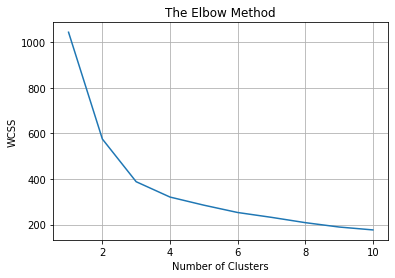

In [42]:
#elbow method clustering pertama
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [43]:
#cluster k = 3 
kmean = KMeans(n_clusters = 3, random_state = 42)
kmean.fit(df4)
dfkmean = df4
label  = pd.DataFrame(kmean.labels_, columns= ['cluster_id'])
label.head()
dfkmean = pd.concat([dfkmean,label], axis = 1)
dfkmean.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_id
0,1.461646,-0.811063,-0.871594,-0.824149,-1.071804,0.289106,-1.689894,1.886691,-1.011889,0
1,-0.774204,-0.333467,-0.055998,-0.031416,0.174228,-0.529308,1.058158,-1.036813,-0.080651,1
2,-0.449155,-0.084814,-0.351638,-0.299072,0.619025,1.390245,1.085502,-0.167474,0.016764,1
3,2.336544,0.128392,-0.659780,-0.247149,-0.429319,2.431863,-1.156690,2.125059,-0.228091,0
4,-0.965588,1.597160,1.632254,2.337545,1.547558,-1.033584,1.126517,-0.700295,2.054588,2


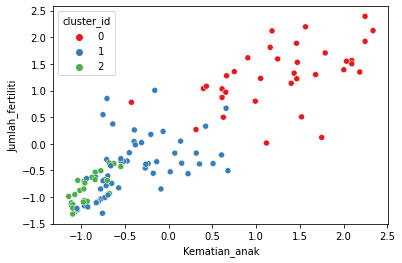

In [44]:
sns.scatterplot(x = 'Kematian_anak', y = 'Jumlah_fertiliti', hue = 'cluster_id', data = dfkmean, palette = 'Set1');

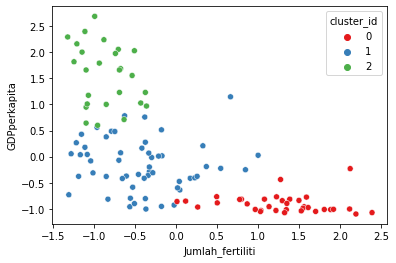

In [45]:
sns.scatterplot(y = 'GDPperkapita', x = 'Jumlah_fertiliti', hue = 'cluster_id', data = dfkmean, palette = 'Set1');

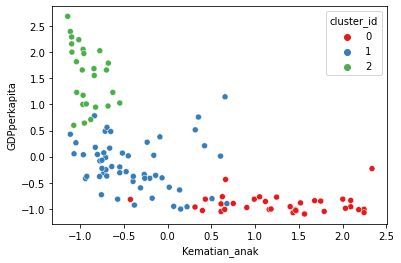

In [46]:
sns.scatterplot(y = 'GDPperkapita', x = 'Kematian_anak', hue = 'cluster_id', data = dfkmean, palette = 'Set1');

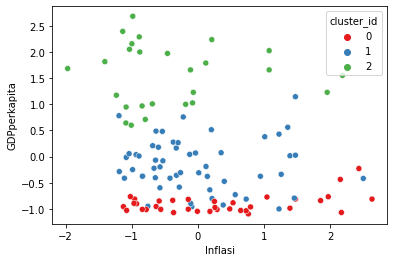

In [47]:
sns.scatterplot(x = 'Inflasi', y = 'GDPperkapita', hue = 'cluster_id', data = dfkmean, palette = 'Set1');

In [65]:
country = df2['Negara']
clust = pd.concat([country,label], axis = 1)
clust.head()

,Negara,cluster_id
0,Afghanistan,0.0
1,Albania,1.0
2,Algeria,1.0
3,Angola,0.0
4,Antigua and Barbuda,2.0


In [66]:
b = clust.dropna(how='any')

In [67]:
b.loc[clust['cluster_id'] == 0]

,Negara,cluster_id
0,Afghanistan,0.0
3,Angola,0.0
18,Bhutan,0.0
19,Bolivia,0.0
21,Botswana,0.0
26,Burundi,0.0
27,Cambodia,0.0
28,Cameroon,0.0
30,Cape Verde,0.0
36,Comoros,0.0
